# **PRÁCTICA 1 - Parte 1: CNNs**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

## **Ejercicio 1: Prueba las siguientes configuraciones y realiza:**

    · Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 
    · Para cada capa analiza los tamaños de entrada y de salida.
    · Plotea y analiza las curvas de aprendizaje


Configuraciones:

    · Red básica: 4 capas CNN, 1 flatten, 1 capa densa

    · Red básica + Pooling

    · Red básica cambiando el kernel size

    · Red básica cambiando el pooling

    · Red básica + dropout:

    · Red básica + batch normalization:

    · Red básica + regularización de capa:

    · Red básica + loss = 'mae'

    · Red cambiando el LR

    · Red metiendo algún Callback


##### **CONFIGURACIÓN 1:** Red básica: 4 capas CNN, 1 flatten, 1 capa densa


MODELO

In [ ]:
# crear modelo secuencial
model = Sequential()

# Vamos añadiendo capas
# 4 capas CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

# 1 flatten
model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 10)                1474570   
                                                                 
Total params: 1,862,986
Trainable params: 1,862,986
Non-

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo1 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo1 = ModelCheckpoint(
    filepath="./mejormodelo1.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo1, 
                            checkpoint_modelo1])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
from tabulate import tabulate

d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986


· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

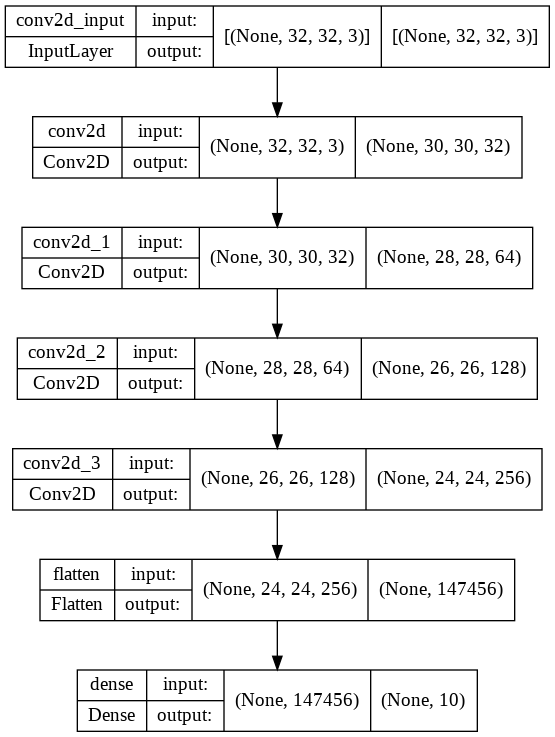

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



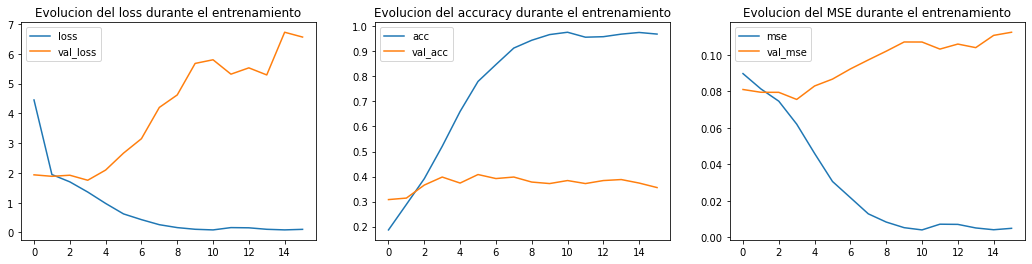

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.</p>

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.</p>

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que son el característico cuando un modelo presenta Overfitting. Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 40% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.</p>

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación aunenta linealmente hasta llegar a un valor mayor a 0.1. De la misma forma que con los valores anteriores podemos ver que el modelo se está sobreajustando y por lo tanto no sería un modelo que esté generalizando.</p>

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 42ms/step - loss: 6.2118 - categorical_accuracy: 0.3800 - mse: 0.1111


[6.2117600440979, 0.3799999952316284, 0.1110592857003212]

##### **CONFIGURACIÓN 2:** Red básica + Pooling


MODELO

In [ ]:
# crear modelo secuencial
model = Sequential()

# Vamos añadiendo capas

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                  

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo2 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo2 = ModelCheckpoint(
    filepath="./mejormodelo2.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo2, 
                            checkpoint_modelo2])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 



---



In [ ]:
from tabulate import tabulate

d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454 , 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426


· Para cada capa analiza los tamaños de entrada y de salida.


---





<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 5x5. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3 y en este caso por haber añadido dos MaxPooling.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

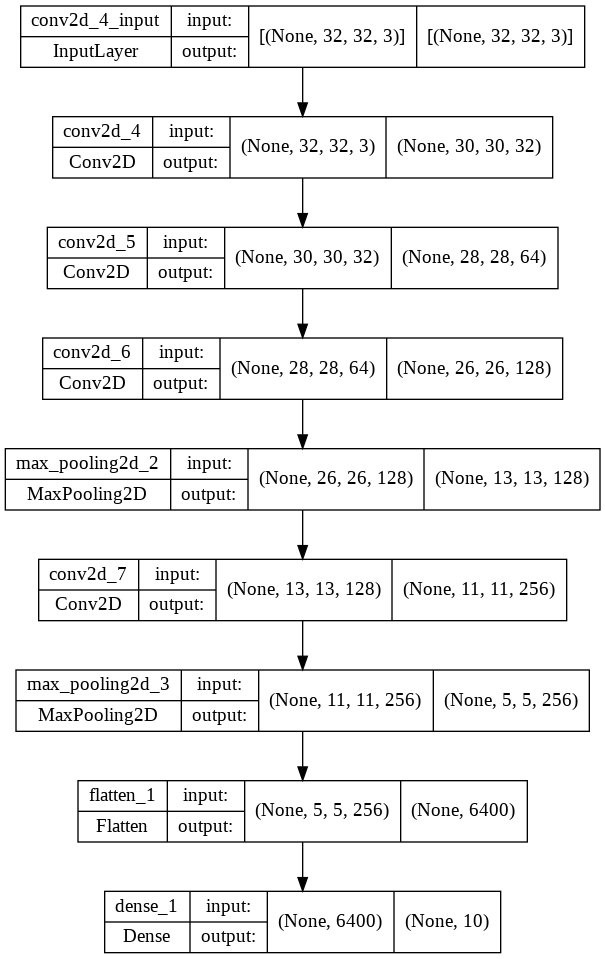

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



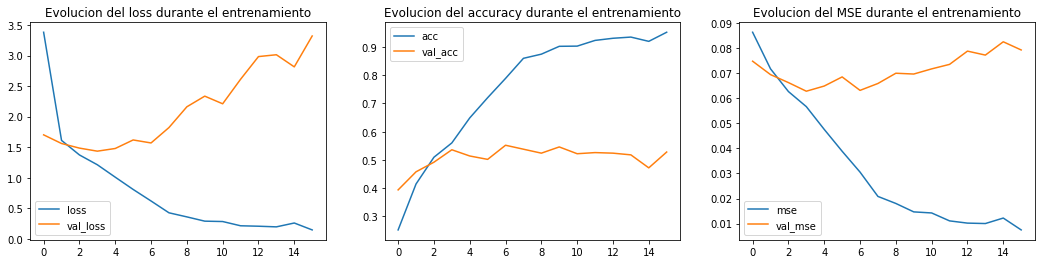

In [ ]:
%matplotlib inline
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que son el característico cuando un modelo presenta Overfitting. Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 50% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación aunenta linealmente hasta llegar a un valor mayor a 0.1. De la misma forma que con los valores anteriores podemos ver que el modelo se está sobreajustando y por lo tanto no sería un modelo que esté generalizando.

EVALUACIÓN 

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 36ms/step - loss: 3.5565 - categorical_accuracy: 0.4800 - mse: 0.0851


[3.5564746856689453, 0.47999998927116394, 0.08506527543067932]

##### **CONFIGURACIÓN 3:** Red básica cambiando el kernel size


MODELO

In [ ]:
# crear modelo secuencial
model = Sequential()

# Vamos añadiendo capas

model.add(Conv2D(32, kernel_size=1, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=1, activation='relu'))
model.add(Conv2D(128, kernel_size=1, activation='relu'))
model.add(Conv2D(256, kernel_size=1, activation='relu'))


model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        128       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 64)        2112      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)       8320      
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 256)       33024     
                                                                 
 flatten_2 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 10)                2621450   
                                                                 
Total params: 2,665,034
Trainable params: 2,665,034
No

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo3 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo3 = ModelCheckpoint(
    filepath="./mejormodelo3.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo3, checkpoint_modelo3])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
from tabulate import tabulate

d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454 , 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426],
      [3, 0.7829 , 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034]]



print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034


· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas no dismnuye quedandose constante en 32x32. Esto se debe a haber cambiado el tamaño del kernel a 1x1, haciendo que el modelo no cambien el tamaño del mapa de caracterísitcas.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

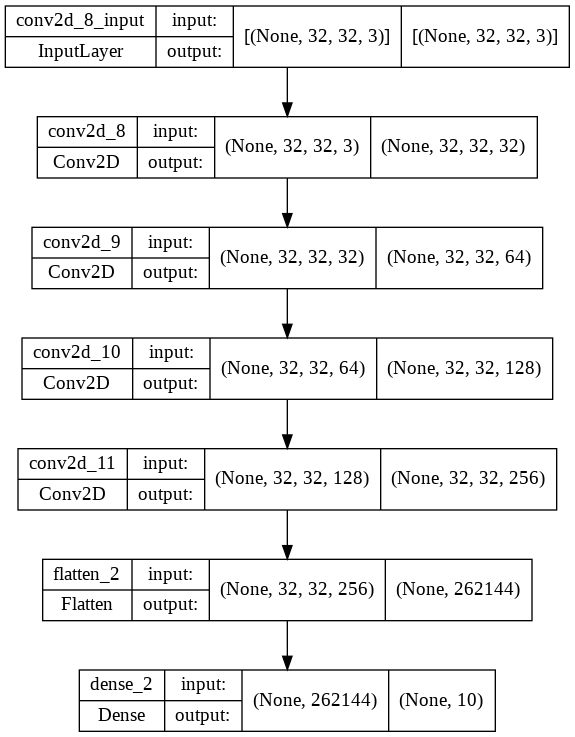

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model3_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



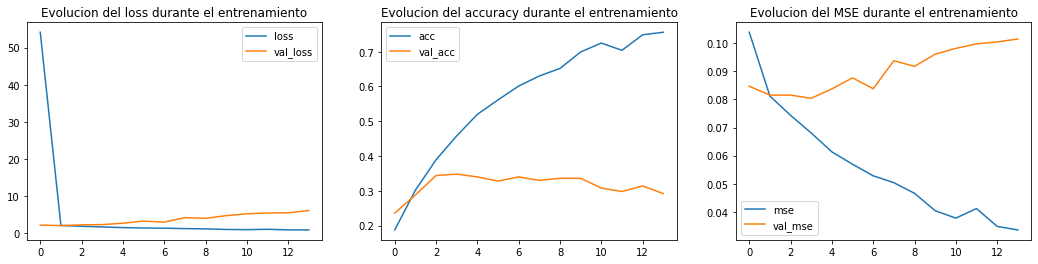

In [ ]:
%matplotlib inline
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que son el característico cuando un modelo presenta Overfitting. Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 30% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir poquito a poquito sin aumentar rápidamente, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación aunenta linealmente hasta llegar a un valor mayor a 0.1. De la misma forma que con los valores anteriores podemos ver que el modelo se está sobreajustando y por lo tanto no sería un modelo que esté generalizando.

EVALUACIÓN 

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 18ms/step - loss: 10.1091 - categorical_accuracy: 0.3000 - mse: 0.1000


[10.109142303466797, 0.30000001192092896, 0.1000041738152504]

##### **CONFIGURACIÓN 4:** Red básica cambiando el pooling

MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(2))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(AveragePooling2D(2))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 average_pooling2d_2 (Averag  (None, 13, 13, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 256)       295168    
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 256)        0         
 ePooling2D)                                          

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo4 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo4 = ModelCheckpoint(
    filepath="./mejormodelo4.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping_modelo4,checkpoint_modelo4 ])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
from tabulate import tabulate

d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454 , 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426],
      [3, 0.7829 , 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292 , 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426]]
 
print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426


· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model. 

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB. 

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 5x5. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3., además también con la influecia del AveragePooling2D.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.



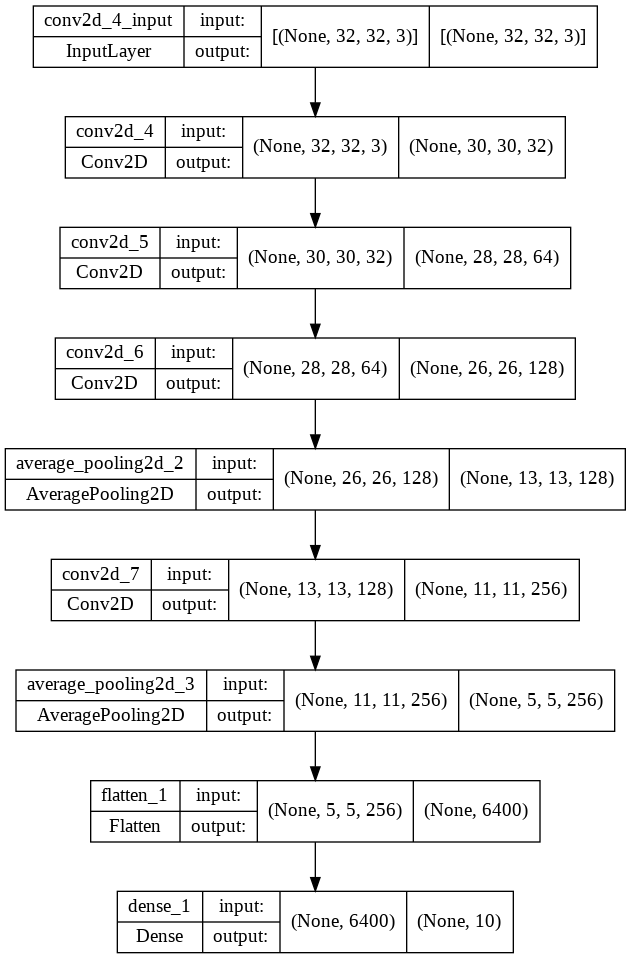

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



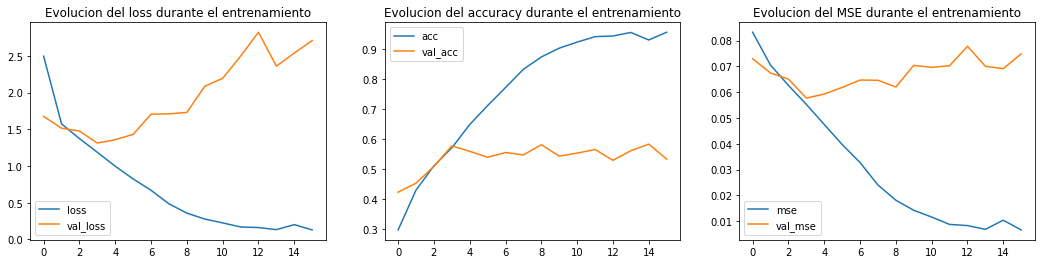

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que son el característico cuando un modelo presenta Overfitting. Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 60% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación aunenta linealmente hasta llegar a un valor mayor a 0.7. De la misma forma que con los valores anteriores podemos ver que el modelo se está sobreajustando y por lo tanto no sería un modelo que esté generalizando.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 38ms/step - loss: 2.5570 - categorical_accuracy: 0.5700 - mse: 0.0711


[2.5569822788238525, 0.5699999928474426, 0.07114098221063614]

##### **CONFIGURACIÓN 5:** Red básica + dropout:


MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Dropout(0.3))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 dropout_2 (Dropout)         (None, 26, 26, 128)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 256)      

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo5 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo5 = ModelCheckpoint(
    filepath="./mejormodelo5.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping_modelo5, checkpoint_modelo5])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
from tabulate import tabulate

d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
      [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
      [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986]]
 
print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">El dropout es una técnica de regularización que se basa en la eliminación de neuronas en las capas de la red neuronal que es aplicada en base a la probabilidad dada por la distribución de Bernoulli que es en lo que influye en este modelo.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

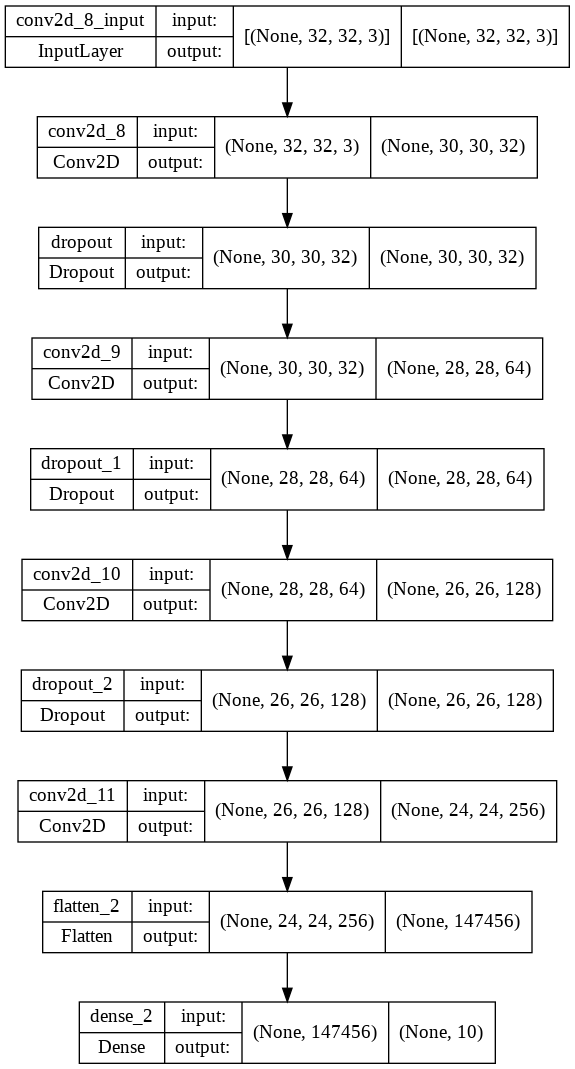

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



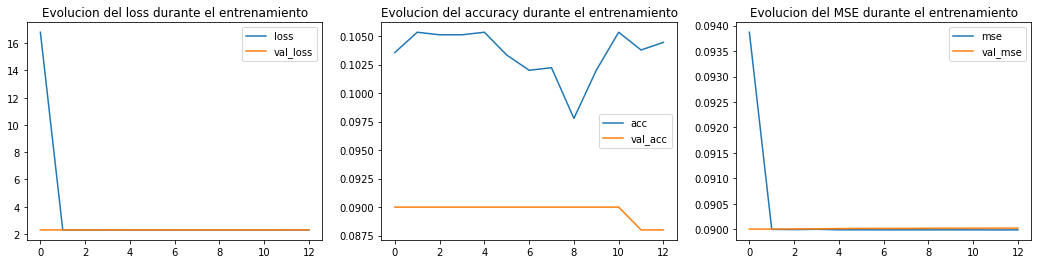

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que han salido bastante mal. Por un lado la Accuracy de los datos de entrenamiento oscila entre 0.0975 y 0.1050, mientras que la Accuracy de los datos de validación se detiene alrededor del 0.09 y a partir de aquí se mantiene constante a lo largo de las epochs menos al final que disminuye levemente. La Loss de los datos de validación se queda constante en 2, mientras que la Loss de los datos de entrenamiento decae drásticamente en la primera epoca en 0 quedandose ahí.

<p align="justify">A su vez, tembién podemos ver como el valor del mse le pasa exactamente igual que en el loss.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 12ms/step - loss: 2.2997 - categorical_accuracy: 0.0700 - mse: 0.0899


[2.299691677093506, 0.07000000029802322, 0.08994536101818085]

##### **CONFIGURACIÓN 6:** Red básica + batch normalization:


MODELO

In [ ]:
model = Sequential()


model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 batch_normalization_2 (Batc  (None, 26, 26, 128)     

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo6 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo6 = ModelCheckpoint(
    filepath="./mejormodelo6.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, callbacks=[early_stopping_modelo6,checkpoint_modelo6])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
      [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
      [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986],
      [6, 0.5740, 16.594, 14.145, 0.9422, 0.4540, 0.4700, 1864906]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">>Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

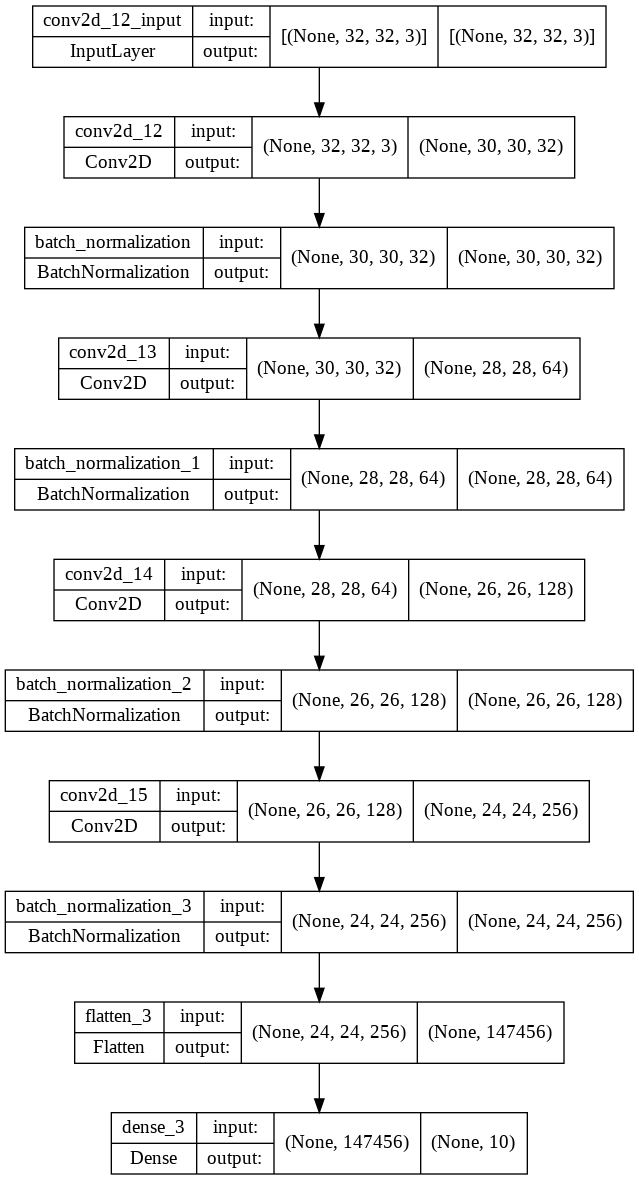

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



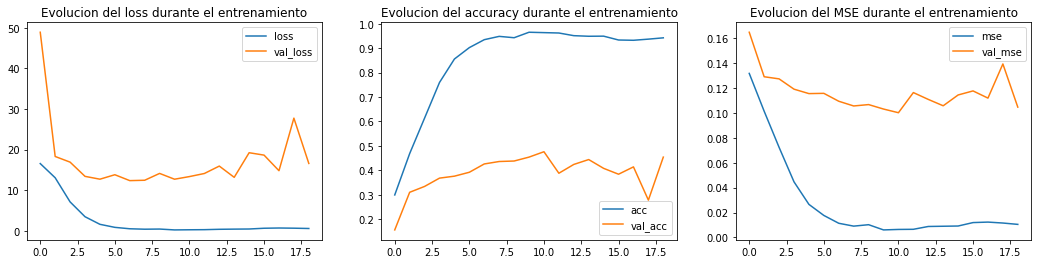

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que se comportan de manera diferente a las gráficas anteriores ya que estas se acercan un poco más los comportamientos de entrenamiento y validación. 

<p align="justify">Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 40% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir pero esta vez quedandose dentro de un mismo rango, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación disminuye lentamente pasando de un valor 0.16 a 0.12. 

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 48ms/step - loss: 14.1457 - categorical_accuracy: 0.4700 - mse: 0.1014


[14.14569091796875, 0.4699999988079071, 0.10143519192934036]

##### **CONFIGURACIÓN 7:** Red básica + regularización de capa:

MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu', activity_regularizer = regularizers.l1(0.01)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 24, 24, 256)       295168    
                                                                 
 flatten_5 (Flatten)         (None, 147456)            0         
                                                                 
 dense_5 (Dense)             (None, 10)                1474570   
                                                                 
Total params: 1,862,986
Trainable params: 1,862,986
No

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo7 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo7 = ModelCheckpoint(
    filepath="./mejormodelo7.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo7,checkpoint_modelo7])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
      [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
      [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986],
      [6, 0.5740, 16.594, 14.145, 0.9422, 0.4540, 0.4700, 1864906],
      [7, 2.3019, 2.3038, 2.2998, 0.1013, 0.0880, 0.0700, 1862986]]
      
print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

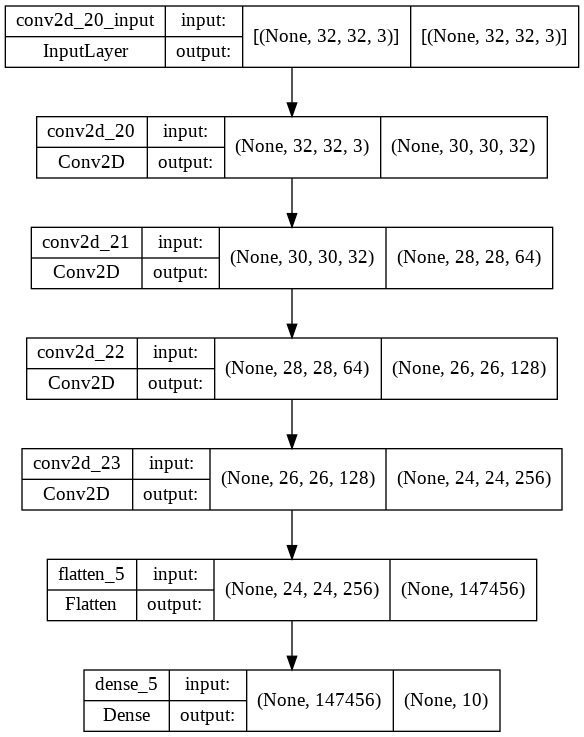

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



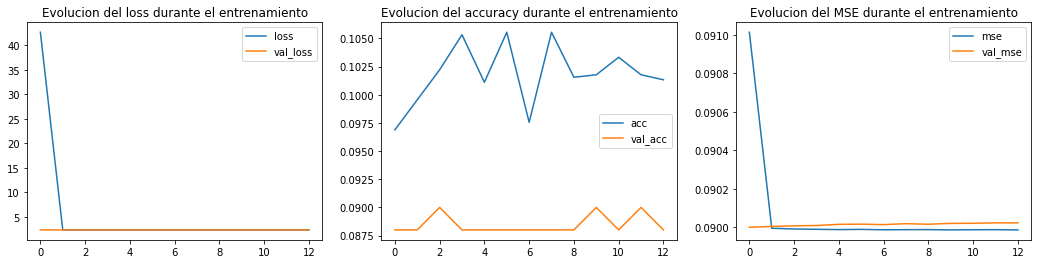

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

Las gráficas nos muestran que este modelo es un completo desastre.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 13ms/step - loss: 2.2998 - categorical_accuracy: 0.0700 - mse: 0.0899


[2.2997848987579346, 0.07000000029802322, 0.08994758874177933]

##### **CONFIGURACIÓN 8:** Red básica + loss = 'mae'

MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 10)                1474570   
                                                                 
Total params: 1,862,986
Trainable params: 1,862,986
Non-

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='mae', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo8 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo8 = ModelCheckpoint(
    filepath="./mejormodelo8.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo8,checkpoint_modelo8])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
      [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
      [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986],
      [6, 0.5740, 16.594, 14.145, 0.9422, 0.4540, 0.4700, 1864906],
      [7, 2.3019, 2.3038, 2.2998, 0.1013, 0.0880, 0.0700, 1862986],
      [8, 0.1792, 0.1792, 0.1680, 0.1038, 0.1040, 0.1600, 1862986]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

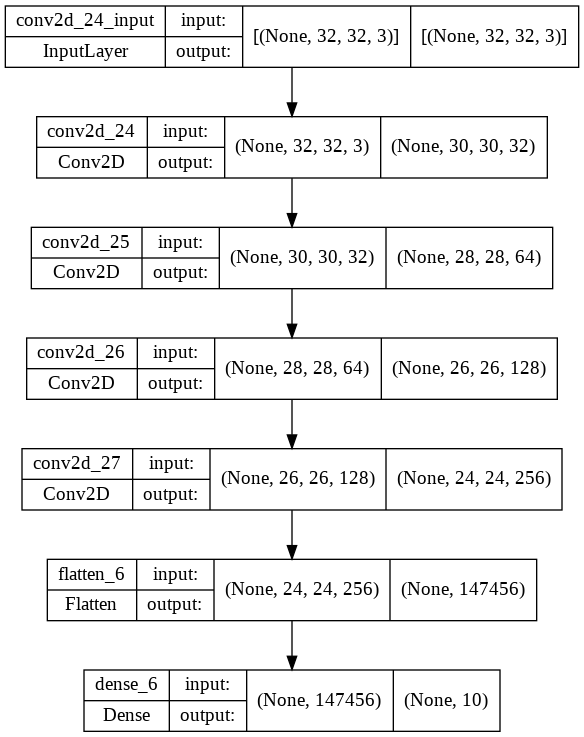

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



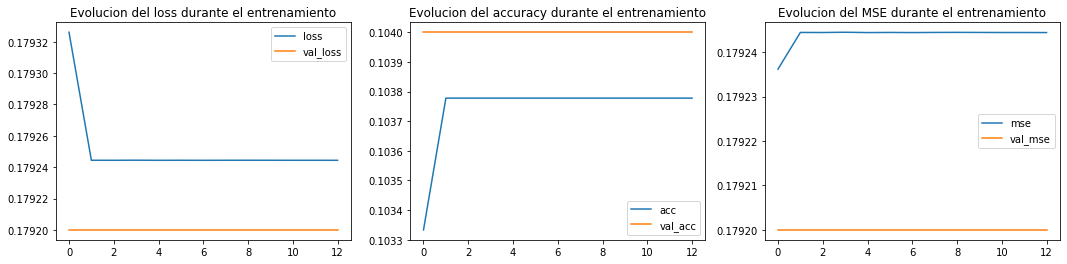

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Las gráficas nos muestran que este modelo es un completo desastre. Ya que nos indica que el modelo no está aprendiendo bien y por lo tanto no esta representandolo correctamente. Esto puede ser debido a que esta configurción no representa bien el problema planteado.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 41ms/step - loss: 0.1680 - categorical_accuracy: 0.1600 - mse: 0.1680


[0.1680000126361847, 0.1599999964237213, 0.1680000126361847]

##### **CONFIGURACIÓN 9:** Red cambiando el LR


MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 256)       295168    
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0         
                                                                 
 dense_3 (Dense)             (None, 10)                1474570   
                                                                 
Total params: 1,862,986
Trainable params: 1,862,986
No

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam(learning_rate=0.05) 
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACKS

In [ ]:
# Ejemplo de uso del callback de earlystopping
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping_modelo9 = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.01)

checkpoint_modelo9 = ModelCheckpoint(
    filepath="./mejormodelo9.h5",save_weights_only = False,
    monitor='val_loss',save_best_only=True,mode='min')

ENTRENAMIENTO

In [ ]:
# Entrenamos
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50, 
                 callbacks=[early_stopping_modelo9,checkpoint_modelo9])

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
d = [ [1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
      [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
      [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
      [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
      [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986],
      [6, 0.5740, 16.594, 14.145, 0.9422, 0.4540, 0.4700, 1864906],
      [7, 2.3019, 2.3038, 2.2998, 0.1013, 0.0880, 0.0700, 1862986],
      [8, 0.1792, 0.1792, 0.1680, 0.1038, 0.1040, 0.1600, 1862986],
      [9, 2.3099, 2.3031, 2.2887, 0.0982, 0.1040, 0.1600, 1862986]]

print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

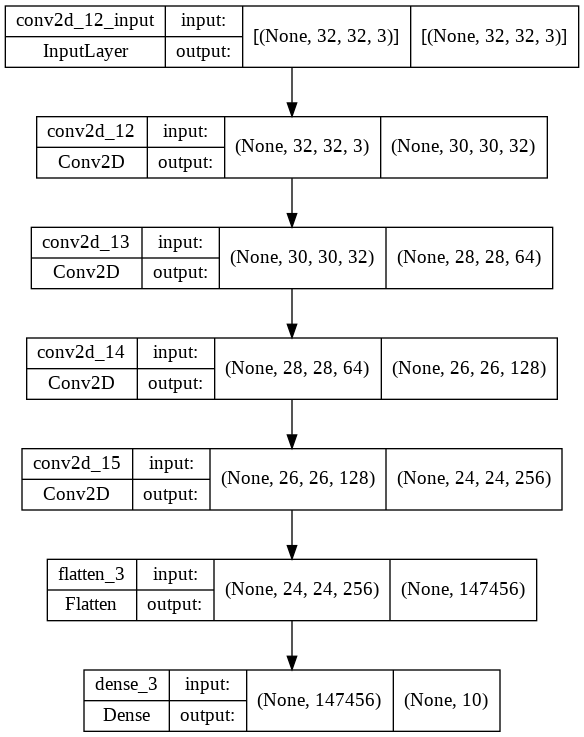

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



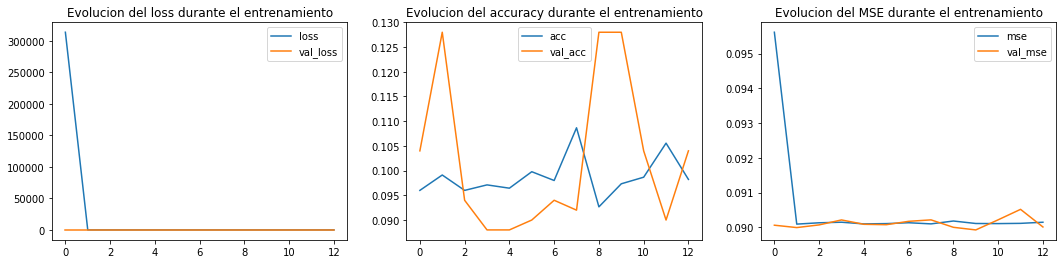

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Por un lado la Accuracy de los datos de entrenamiento se queda constante con las epochs, alcanzando valores entre 0.090 y 0.105,mientras que la Accuracy de los datos de validación se comporta de manera "aleatoria". La Loss de los datos de validación se quedan constantes en 0, mientras que la Loss de los datos de entrenamiento disminuye en la primera epoca a 0  mantendiendose hasta el final.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento se comporta de la misma manera que el loss de entrenamiento, con la diferencia de que en este caso el mse de valicacion ascila entre 0.09.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 13ms/step - loss: 2.2887 - categorical_accuracy: 0.1600 - mse: 0.0897


[2.288701295852661, 0.1599999964237213, 0.08971207588911057]

##### **CONFIGURACIÓN 10:** Red metiendo algún Callback


<p align="justify">Como se ha realizado todas las configuraciones anteriores con callback, en vez de añadir un callback se realizará sin.</p>

MODELO

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))

In [ ]:
# Este es el modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 256)       295168    
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 10)                1474570   
                                                                 
Total params: 1,862,986
Trainable params: 1,862,986
Non-

OPTIMIZADOR, FUNCIÓN DE COSTE Y MÉTRICAS

In [ ]:
# Compilamos el modelo
optimizer_adam = Adam() # learning_rate=0.01
model.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['categorical_accuracy','mse'])

CALLBACK

In [ ]:
# Ninguno

ENTRENAMIENTO

In [ ]:
hist = model.fit(X_train, y_train, validation_split=0.1, epochs=50)

· Una tabla donde apuntes: loss entrenamiento, loss de validación, loss de test, accuracy entrenamiento, accuracy de validación, accuracy de test, número de parámetros. 

---



In [ ]:
from tabulate import tabulate
d = [[1, 0.1055, 6.5644, 6.2118, 0.9689, 0.3560, 0.3800, 1862986],
     [2, 0.1454, 3.3200, 3.5565, 0.9518, 0.5280, 0.4800, 452426 ],
     [3, 0.7829, 6.0213, 0.1091, 0.7560, 0.2920, 0.3000, 2665034],
     [4, 0.1292, 2.7097, 2.5570, 0.9562, 0.5340, 0.5700, 452426 ],
     [5, 2.3020, 2.3037, 2.2997, 0.1044, 0.0880, 0.0700, 1862986],
     [6, 0.5740, 16.594, 14.145, 0.9422, 0.4540, 0.4700, 1864906],
     [7, 2.3019, 2.3038, 2.2998, 0.1013, 0.0880, 0.0700, 1862986],
     [8, 0.1792, 0.1792, 0.1680, 0.1038, 0.1040, 0.1600, 1862986],
     [9, 2.3099, 2.3031, 2.2887, 0.0982, 0.1040, 0.1600, 1862986],
     [10, 1.1265, 10.8638, 8.9455, 0.5811, 0.1700, 0.1500, 1862986]]


print(tabulate(d, headers=["Modelo", 
                           "loss entrenamiento", "loss validación", "loss test", 
                           "accuracy entrenamiento", "accuracy validación", "accuracy test", 
                           "número de prámetros"]))

  Modelo    loss entrenamiento    loss validación    loss test    accuracy entrenamiento    accuracy validación    accuracy test    número de prámetros
--------  --------------------  -----------------  -----------  ------------------------  ---------------------  ---------------  ---------------------
       1                0.1055             6.5644       6.2118                    0.9689                  0.356             0.38                1862986
       2                0.1454             3.32         3.5565                    0.9518                  0.528             0.48                 452426
       3                0.7829             6.0213       0.1091                    0.756                   0.292             0.3                 2665034
       4                0.1292             2.7097       2.557                     0.9562                  0.534             0.57                 452426
       5                2.302              2.3037       2.2997                    0.1044

· Para cada capa analiza los tamaños de entrada y de salida.

---




<p align="justify">Para analizar los tamaños de entrada y salida del modelo, primero creamos con plot_model.

<p align="justify">Un detalle a fijarese es el parámetro de fomra de input_shape. En este caso de estudio es de 32x32 para el tamaño y 3 para la profundidad de color en RGB.

<p align="justify">Recordamos que en general las capas convolucionales operan sobre tensores 3D, llamados mapas de características (feature maps), con dos ejes espaciales de altura y anchura, además de un eje de canal también llamado profundidad. Para una imagen de color RGB, la dimension del eje depth es 3, pues la imagen tiene tres canales: rojo, verde y azul.

<p align="justify">Podemos observar que el número de mapas de características (profundiad) aumenta progresivamente en la red de 32 a 256, mientras que el tamaño de los mapas de caracterísitcas disminuye de 30x30 a 24x24. Este es un patrón que se usa a menuda en redes neuronales convolucionales que es causa de el kernel_size 3x3.

<p align="justify">Con el método model.summary() realizado con anterioridad, podemos ver con detalle cómo cambian las dimensiones de los mapas de caracterísitcas en cada capa sucesiva. Recordamnos además que la columna "Output Shape" muestra el tamaño de los mapas de características en cada una de las capas.

<p align="justify">Donde podemos ver donde influye esta configuración es tanto en la rapidez en la que se realiza el modelo y en que antes los guardabamos los mejores paráemtros.

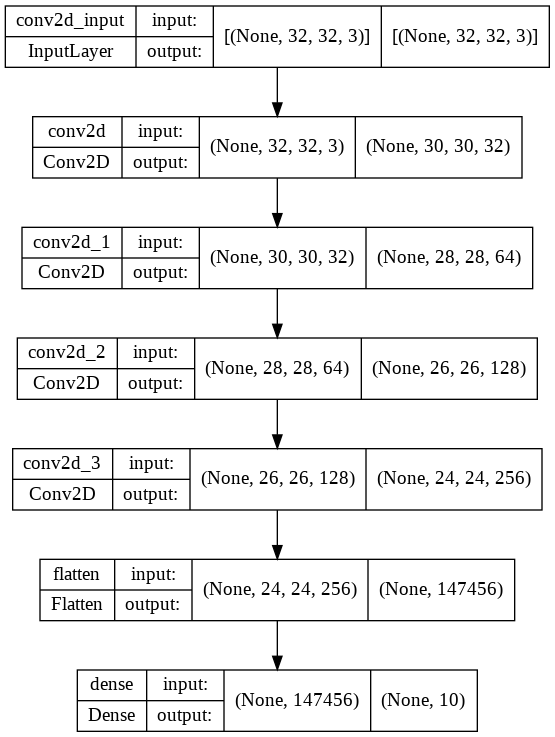

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

· Plotea y analiza las curvas de aprendizaje

---



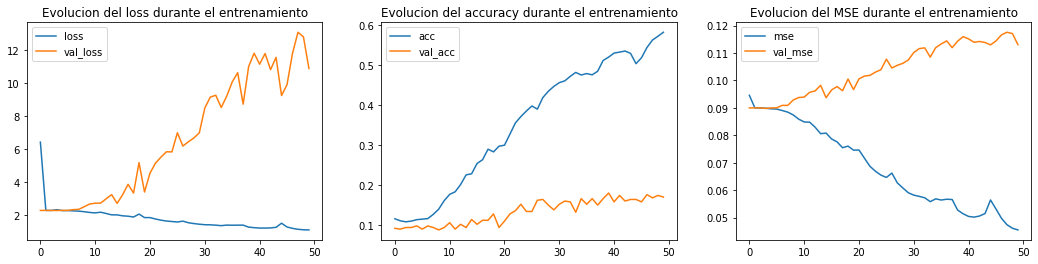

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                    figsize=(18, 4))
# Ploteamos la evolucion del loss durante el entrenamiento
ax0.set_title('Evolucion del loss durante el entrenamiento')
ax0.plot(hist.history['loss'],label="loss")
ax0.plot(hist.history['val_loss'],label="val_loss")
ax0.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax1.set_title('Evolucion del accuracy durante el entrenamiento')
ax1.plot(hist.history['categorical_accuracy'],label="acc")
ax1.plot(hist.history['val_categorical_accuracy'],label="val_acc")
ax1.legend()

# Ploteamos la evolucion de la métrica durante el entrenamiento
ax2.set_title('Evolucion del MSE durante el entrenamiento')
ax2.plot(hist.history['mse'],label="mse")
ax2.plot(hist.history['val_mse'],label="val_mse")
ax2.legend()
plt.show()

<p align="justify">Como sabemos, el modelo recoge al final de cada epoch los valores del loss y el accuracy de los datos de entenamiento y validación. Este los almacena en un diccionario por lo que nos permite expresarlos fácilemnte en una gráfica que nos ayudará a ver más fácilmente la evolución de estas variables.

<p align="justify">En el gráfico de la izquierda se presenta el Loss obtenido en cada epoch, tanto para los datos de entrenamiento como los de validación. El gráfico de en medio vemos la evolución en cada epoch del Accuracy para los dos conjunto de datos. El último gráfico, de la misma manera que los dos anteriores, representala evolución del MSE tanto en entrenamiento como en test.

<p align="justify">Si miramos el comportamiento general de estas gráficas vemos que son el característico cuando un modelo presenta Overfitting. Por un lado la Accuracy de los datos de entrenamiento aumenta linealmente con las epochs, hasta alcanzar casi el 100%, mientras que la Accuracy de los datos de validación se detiene alrededor del 10% y a partir de aquí se mantiene constante a lo largo de las epochs. La Loss de los datos de validación alcanza su mínimo después de pocos epochs y luego empieza a subir, mientras que la Loss de los datos de entrenamiento disminuye linealmente hasta llegar a casi 0 donde se mantiene.

<p align="justify">A su vez, tembién podemos ver como el valor del mse de entrenamiento disminuye linealmente hasta llegar a cero, mietras el de validación aunenta linealmente hasta llegar a un valor mayor a 0.1. De la misma forma que con los valores anteriores podemos ver que el modelo se está sobreajustando y por lo tanto no sería un modelo que esté generalizando.

EVALUACIÓN

In [ ]:
# Evaluamos el modelo en Test
score = model.evaluate(X_test,y_test)
score

4/4 [==============================] - 0s 40ms/step - loss: 8.9455 - categorical_accuracy: 0.1500 - mse: 0.1124


[8.94546127319336, 0.15000000596046448, 0.11235685646533966]